In [1]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


from subprocess import check_output

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\P1315289\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Store the data into the df variable
#Get in some data
url='~/Desktop/NUS GBAP/model_data_v2.csv'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df = pd.read_csv(url)
#df.head(10)


<ipython-input-2-0813b08b07f8>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# Keeping only the neccessary columns
df = df[['Comments']]
df = df.replace(r'^\s*$', np.nan, regex=True)
df = df.dropna()

In [4]:
df['Comments']=df['Comments'].apply(str)


In [5]:
import re
def  clean_text(df, text_field, new_text_field_name):
    df[new_text_field_name] = df[text_field].str.lower() #lowercase
   # df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    #remove.............. (#re sub / search/ ..)
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"[^\w\s]", "", elem))  


    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return df

In [6]:
df_clean = clean_text(df, 'Comments', 'Comments_clean')
df_clean.head()

,Comments,Comments_clean
0,Beneficial NIL,beneficial nil
1,"Challenging, Growth, Perseverance More programs on tips and tricks with hands-on on how to code efficiently.",challenging growth perseverance more programs on tips and tricks with handson on how to code efficiently
2,"Unique, Interesting, Enriching. I hope COVID is over, for more face to face hands on meeting.",unique interesting enriching i hope covid is over for more face to face hands on meeting
3,"Okay entry point need to do projects more inline with what we agreed on when we joined Nucleus. Eg, a software engineer in the Nucleus program should do a software engineering job rather than L1 support job.",okay entry point need to do projects more inline with what we agreed on when we joined nucleus eg a software engineer in the nucleus program should do a software engineering job rather than l support job
4,A good start Bootcamp trainings can be improved,a good start bootcamp trainings can be improved


In [7]:
stop = stopwords.words('english')
stop #the list of the stopwords ! 


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
#remove stop words

df_clean['text_clean'] = df_clean['Comments_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_clean.head()

,Comments,Comments_clean,text_clean
0,Beneficial NIL,beneficial nil,beneficial nil
1,"Challenging, Growth, Perseverance More programs on tips and tricks with hands-on on how to code efficiently.",challenging growth perseverance more programs on tips and tricks with handson on how to code efficiently,challenging growth perseverance programs tips tricks handson code efficiently
2,"Unique, Interesting, Enriching. I hope COVID is over, for more face to face hands on meeting.",unique interesting enriching i hope covid is over for more face to face hands on meeting,unique interesting enriching hope covid face face hands meeting
3,"Okay entry point need to do projects more inline with what we agreed on when we joined Nucleus. Eg, a software engineer in the Nucleus program should do a software engineering job rather than L1 support job.",okay entry point need to do projects more inline with what we agreed on when we joined nucleus eg a software engineer in the nucleus program should do a software engineering job rather than l support job,okay entry point need projects inline agreed joined nucleus eg software engineer nucleus program software engineering job rather l support job
4,A good start Bootcamp trainings can be improved,a good start bootcamp trainings can be improved,good start bootcamp trainings improved


In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\P1315289\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#tokenize
df_clean['text_tokens'] = df_clean['text_clean'].apply(lambda x: word_tokenize(x))
df_clean.head()

,Comments,Comments_clean,text_clean,text_tokens
0,Beneficial NIL,beneficial nil,beneficial nil,"[beneficial, nil]"
1,"Challenging, Growth, Perseverance More programs on tips and tricks with hands-on on how to code efficiently.",challenging growth perseverance more programs on tips and tricks with handson on how to code efficiently,challenging growth perseverance programs tips tricks handson code efficiently,"[challenging, growth, perseverance, programs, tips, tricks, handson, code, efficiently]"
2,"Unique, Interesting, Enriching. I hope COVID is over, for more face to face hands on meeting.",unique interesting enriching i hope covid is over for more face to face hands on meeting,unique interesting enriching hope covid face face hands meeting,"[unique, interesting, enriching, hope, covid, face, face, hands, meeting]"
3,"Okay entry point need to do projects more inline with what we agreed on when we joined Nucleus. Eg, a software engineer in the Nucleus program should do a software engineering job rather than L1 support job.",okay entry point need to do projects more inline with what we agreed on when we joined nucleus eg a software engineer in the nucleus program should do a software engineering job rather than l support job,okay entry point need projects inline agreed joined nucleus eg software engineer nucleus program software engineering job rather l support job,"[okay, entry, point, need, projects, inline, agreed, joined, nucleus, eg, software, engineer, nucleus, program, software, engineering, job, rather, l, support, job]"
4,A good start Bootcamp trainings can be improved,a good start bootcamp trainings can be improved,good start bootcamp trainings improved,"[good, start, bootcamp, trainings, improved]"


# stemming #PorterStemmer 
#need stemming? Stemming or lemmatization ?
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text
df_clean['text_clean_tokens'] = df_clean['text_tokens'].apply(lambda x: word_stemmer(x))
df_clean.head()

#print(df_clean)


In [11]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df_clean['text_clean_tokens'] = df_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
#df_clean.head()
print(df_clean)


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Comments  \
0    Beneficial NIL                                   

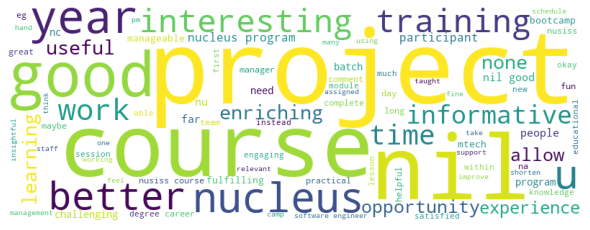

In [12]:
text = df['text_clean_tokens']

wordcloud = WordCloud(width = 800, height = 300, 
                background_color ='white', 
                min_font_size = 10).generate(str(text)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [13]:
#pip install vaderSentiment
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\P1315289\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#if score  0.05 then Positive. if score <= - 0.05, then Negative

In [15]:
dfV = pd.read_csv('~/Desktop/NUS GBAP/model_data_v2.csv')

In [16]:
analyzer = SentimentIntensityAnalyzer()
#new column to show the compound
dfV['Compound'] = dfV['Comments'].astype(str).apply(lambda x:analyzer.polarity_scores(x)['compound'])
dfN = dfV.drop(columns=['Comments'])
dfN.head()

,referral_likelihood,job_satisfy,tasks_satisfy,work_hours_satisfy,withdrawal,line_manager,work_hours,no_days_since_joined,no_hours_ot,graduate_likelihood,Compound
0,2,4,Yes,Yes,No,3,40-44 hours,133,0,2,0.4404
1,2,4,Yes,Yes,No,4,40-44 hours,196,1,2,0.6597
2,1,3,Yes,Yes,No,3,More than 54 hours,808,6,2,0.6808
3,0,3,Yes,No,No,5,45-49 hours,252,0,0,0.6908
4,2,4,Yes,Yes,No,4,40-44 hours,161,2,1,0.7184


# Data cleaning

In [ ]:
from datetime import datetime
dfN['join_date'] = pd.to_datetime(dfN['join_date'], format='%m/%d/%Y')
dfN['no_days_since_joined'] = (datetime.now()-dfN['join_date']).astype('timedelta64[D]').astype(int)
dfN = dfN.drop(columns=['join_date'])

In [ ]:
#print(dfN)

In [ ]:
#print (dfN.iloc[93,21])

In [ ]:
# fix negative no_days_since_joined values
dfN.iloc[84,21] = 34
dfN.iloc[93,21] = 5


In [ ]:
print (dfN.iloc[84,21])
print (dfN.iloc[93,21])

In [ ]:

dfN["graduate_likelihood"].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1, 8:2,9:2, 10:2}, inplace=True)
dfN["referral_likelihood"].replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1, 7:1, 8:2,9:2, 10:2}, inplace=True)

#1-5 > 0
#6-7 > 1
#8-10 > 2
print(dfN['graduate_likelihood'])

In [ ]:
# convert line and project manager feedback and overall job satisfaction to rating scale of 1 to 5
dfN['line_manager'] = dfN['line_manager'].replace({"I have a ‘strictly business’ relationship with my RO/line/career manager and feel his/her decisions are often good and in line with my interests":3,
                                                  "I respect my RO/line/career manager with whom I have a cordial relationship and I feel he/she makes correct decisions":4,
                                                  "My RO/line/career manager inspires me, is someone I trust and I feel he/she has my interests at heart.":5,
                                                  "I sometimes disagree with my RO/line/career manager and feel that his/her decisions are often not in line with my interests":2,
                                                  "I do not respect my RO/line/career manager and feel he/she makes decisions that are not in my interest":1})
dfN['project_manager'] = dfN['project_manager'].replace({"I have ‘strictly business’ relationships with my project managers and feel their decisions are often good and in line with my interests":3,
                                                        "My project managers inspire me, I trust them and I feel they have my interests at heart":5,
                                                        "I respect my project managers with whom I have a cordial relationship and I feel they make correct decisions":4,
                                                        "I sometimes disagree with my project managers and feel that their decisions are often not in line with my interests\t":2,
                                                        "I do not respect my project managers and feel they makes decisions that are not in my interest":1})
dfN['job_satisfy'] = dfN['job_satisfy'].replace({'I am satisfied with my job':4,
                                                'I am fairly satisfied with my job':3,
                                                'I am very happy and satisfied with my job':5,
                                                'I am not very satisfied with my job':2,
                                                'I am not at all satisfied or happy with my job':1})

In [ ]:
dfN['tasks_satisfy'] = dfN['tasks_satisfy'].replace(['No'], 0)
dfN['tasks_satisfy'] = dfN['tasks_satisfy'].replace(['Yes'], 1)
dfN['work_hours_satisfy'] = dfN['work_hours_satisfy'].replace(['No'], 0)
dfN['work_hours_satisfy'] = dfN['work_hours_satisfy'].replace(['Yes'], 1)
dfN['withdrawal'] = dfN['withdrawal'].replace(['No'], 0)
dfN['withdrawal'] = dfN['withdrawal'].replace(['Yes'], 1)
dfN['work_hours'] = dfN['work_hours'].replace(['40-44 hours'], 0)
dfN['work_hours'] = dfN['work_hours'].replace(['45-49 hours'], 1)
dfN['work_hours'] = dfN['work_hours'].replace(['50-54 hours'], 2)
dfN['work_hours'] = dfN['work_hours'].replace(['More than 54 hours'], 3)

dfN['tasks_satisfy'] = pd.Categorical(dfN['tasks_satisfy'])
dfN['work_hours_satisfy'] = pd.Categorical(dfN['work_hours_satisfy'])
dfN['withdrawal'] = pd.Categorical(dfN['withdrawal'])
dfN['work_hours'] = pd.Categorical(dfN['work_hours'])

In [ ]:
print(dfN)

In [ ]:
#positive sentiment: compound score >= 0.05
#neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
#negative sentiment: compound score <= -0.05

In [ ]:
import seaborn as sns
sns.factorplot('gender',data=dfN,kind='count')


In [ ]:
sns.factorplot('graduate_likelihood',data=dfN,kind='count')


In [ ]:
sns.factorplot('graduate_likelihood',data=dfN,hue='gender',kind='count')


In [ ]:
sns.boxplot(data=dfN, x ='graduate_likelihood', y='no_days_since_joined', palette="Set3")

# change to tweet tokenizer and stop words = English. follow sek ee. eda needs to correlate to the hypothesis

In [ ]:
sns.swarmplot(data=dfN, x='graduate_likelihood', y='age_group')

In [ ]:
sns.swarmplot(data=dfN, x='graduate_likelihood', y='withdrawal')

# plots for job satisfication, overtime hours

# Hypothesis Testing


H0: Employees who are satisfied with their job, do minimal overtime and never had to withdraw last minute from an NUS course are more likely to complete the 5 year training program​

HA: Employees who are not satisfied with their job, work a lot of overtime and ever had to withdraw last minute from an NUS course are unlikely to complete the 5 year training program


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
dfN.head()

In [ ]:
def get_p_value_chi2(column1, column2, df):
    contingency = df[[column1, column2]]
    contingency = pd.crosstab(contingency[column1], contingency[column2])
    c, p, dof, expected = chi2_contingency(contingency)
    return p

In [ ]:
# categorical variable importance
cols = list(dfN.drop(columns=['graduate_likelihood', 'Comments', 'no_days_since_joined', 'no_hours_ot']).columns)
test_indep = {}
for col in cols:
    p_value = get_p_value_chi2(col, 'graduate_likelihood', df6)
    test_indep[col] = p_value
dict(sorted(test_indep.items(), key=lambda item: item[1]))

In [ ]:
contigency1= pd.crosstab(dfN['job_satisfy'], dfN['graduate_likelihood']) 
# Chi-square test of independence.
contigency1


In [ ]:
c, p, dof, expected = chi2_contingency(contigency1) 
# Print the p-value
print(p)

In [ ]:
contigency2= pd.crosstab(dfN['work_hours'], dfN['graduate_likelihood']) 
contigency2

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency2) 
# Print the p-value
print(p)

In [ ]:
contigency3= pd.crosstab(dfN['withdrawal'], dfN['graduate_likelihood']) 
contigency3

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency3) 
# Print the p-value
print(p)

In [ ]:
contigency4= pd.crosstab(dfN['age_group'], dfN['graduate_likelihood']) 
contigency4

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency4) 
# Print the p-value
print(p)

# double check all these

# Modelling

In [ ]:
dfM= pd.read_csv('model_data_with_text_v2.csv')
dfM.head()

In [ ]:

dfM['referral_likelihood'] = pd.Categorical(dfM['referral_likelihood']).as_ordered()
dfM['job_satisfy'] = pd.Categorical(dfM['job_satisfy']).as_ordered()
dfM['line_manager'] = pd.Categorical(dfM['line_manager']).as_ordered()
dfM['graduate_likelihood'] = pd.Categorical(dfM['graduate_likelihood']).as_ordered()

In [ ]:
dfM['tasks_satisfy'] = dfM['tasks_satisfy'].replace(['No'], 0)
dfM['tasks_satisfy'] = dfM['tasks_satisfy'].replace(['Yes'], 1)
dfM['work_hours_satisfy'] = dfM['work_hours_satisfy'].replace(['No'], 0)
dfM['work_hours_satisfy'] = dfM['work_hours_satisfy'].replace(['Yes'], 1)
dfM['withdrawal'] = dfM['withdrawal'].replace(['No'], 0)
dfM['withdrawal'] = dfM['withdrawal'].replace(['Yes'], 1)
dfM['work_hours'] = dfM['work_hours'].replace(['40-44 hours'], 0)
dfM['work_hours'] = dfM['work_hours'].replace(['45-49 hours'], 1)
dfM['work_hours'] = dfM['work_hours'].replace(['50-54 hours'], 2)
dfM['work_hours'] = dfM['work_hours'].replace(['More than 54 hours'], 3)

dfM['tasks_satisfy'] = pd.Categorical(dfM['tasks_satisfy'])
dfM['work_hours_satisfy'] = pd.Categorical(dfM['work_hours_satisfy'])
dfM['withdrawal'] = pd.Categorical(dfM['withdrawal'])
dfM['work_hours'] = pd.Categorical(dfM['work_hours'])

In [ ]:
dfM.head()

In [ ]:
#dfM=dfM.drop(columns=['Comments'])

In [ ]:
#dfM.columns = dfM.columns.str.replace(' ', '')

In [ ]:
#dfM=dfM.drop(columns=['ID', 'gender', 'age_group','education', 'school', 'major', 'department', 'no_non_iss_mods','no_iss_mods', 'grant_stop'])

In [ ]:
dfY= dfM['graduate_likelihood']

In [ ]:
dfX= dfM.drop(columns=['graduate_likelihood'])

In [ ]:
3dfX

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(dfX,dfY, test_size = 0.25, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.20, random_state=42)

In [ ]:
#dfM = dfM.replace(r'^\s*$', np.nan, regex=True)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 100 decision trees
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
classifier.fit(X_train, y_train);
# Use the forest's predict method on the test data
predictions = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=6, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))